# **FUZZY C-MEANS**

## FUZZY C-MEANS CLUSTERING

Fuzzy C-Means Clustering adalah teknik pengelompokan data (clustering) yang mirip dengan *K-Means*, namun memiliki pendekatan yang lebih fleksibel dalam penentuan keanggotaan suatu data pada cluster.

Fuzzy C-Means (FCM) merupakan algoritma klasterisasi tak terawasi (unsupervised) yang memungkinkan satu data masuk ke lebih dari satu klaster dengan tingkat keanggotaan tertentu (nilai antara 0 dan 1).

Berbeda dengan K-Means yang bersifat keras (hard clustering) (satu data hanya masuk ke satu klaster), FCM bersifat lunak (soft/fuzzy clustering).

### KONSEP DASAR FUZZY C-MEANS CLUSTERING

Fuzzy C-Means adalah metode klasterisasi berbasis teori himpunan fuzzy. Berbeda dengan klasterisasi biasa seperti K-Means (yang menetapkan data hanya ke satu klaster secara mutlak), FCM memperbolehkan setiap data menjadi anggota beberapa klaster sekaligus, dengan tingkat keanggotaan berbeda-beda.

Inti dari Konsep FCM:
Soft Clustering (Klasterisasi Lunak):

- Setiap data memiliki nilai keanggotaan (membership) terhadap masing-masing klaster.

- Nilai keanggotaan ini berada di antara 0 hingga 1.

- Semakin dekat data ke pusat klaster, semakin tinggi nilai keanggotaannya terhadap klaster tersebut.

Pusat Klaster (Centroid):

- Setiap klaster diwakili oleh satu pusat (centroid).

- Lokasi pusat ini dihitung berdasarkan kontribusi keanggotaan dari semua data.

Fungsi Tujuan (Objective Function):

- Tujuan algoritma adalah meminimalkan jarak total antara data dan pusat klaster, dikalikan dengan derajat keanggotaan yang dipangkatkan (biasanya dengan eksponen 2).

- Artinya: data yang dekat ke pusat klaster akan memberi pengaruh lebih besar terhadap posisi klaster.

Fuzziness Parameter (m):

- Parameter 𝑚>1 yang mengontrol tingkat kekaburan (fuzziness).

- Semakin besar nilai
𝑚
, semakin kabur (fuzzy) klasternya


### ALGORITMA FUZZY C-MEANS CLUSTERING

Proses kerja algoritma Fuzzy C-Means adalah sebagai berikut:

1. Inisialisasi:

   * Tentukan jumlah cluster (*c*), parameter fuzziness (*m*), batas toleransi error (*ε*), dan nilai maksimum iterasi.
   * Inisialisasi *membership matrix* $U_{ij}$ secara acak, dengan syarat:

     $$
     \sum_{j=1}^c U_{ij} = 1, \quad \forall i
     $$

2. Hitung Centroid Pusat Cluster:

   $$
   v_j = \frac{\sum_{i=1}^n (U_{ij})^m \cdot x_i}{\sum_{i=1}^n (U_{ij})^m}
   $$

   Di mana:

   * $v_j$ adalah pusat cluster ke-j
   * $x_i$ adalah data ke-i
   * $U_{ij}$ adalah nilai keanggotaan data ke-i terhadap cluster ke-j

3. Update Nilai Matrix:

   $$
   U_{ij} = \frac{1}{\sum_{k=1}^c \left( \frac{\|x_i - v_j\|}{\|x_i - v_k\|} \right)^{\frac{2}{m-1}}}
   $$

   Di mana:

   * $\|x_i - v_j\|$ adalah jarak antara data ke-i dengan pusat cluster ke-j

4. Cek Konvergensi:

   * Jika perubahan nilai *membership matrix* kurang dari ε atau sudah mencapai iterasi maksimum, maka proses dihentikan.
   * Jika belum, kembali ke langkah 2.

## CONTOH MANUAL PERHITUNGAN FUZZY C-MEANS CLUSTERING

Berikut adalah contoh lengkap **perhitungan manual Fuzzy C-Means (FCM)** hingga konvergen, disertai dengan perhitungan **fungsi objektifnya**. Agar mudah dipahami, kita akan gunakan:


**Data:**
Misalnya kita punya 4 data satu dimensi:

$$
X = \{1, 2, 5, 6\}
$$

**Jumlah Cluster (c):** 2
**Tingkat Fuzziness (m):** 2 (umumnya digunakan)
**Kriteria Konvergensi:** perbedaan pusat cluster < 0.01



### **Langkah 1: Inisialisasi Matriks Keanggotaan $U$**

Ukuran matriks: $c \times n = 2 \times 4$

Misalkan kita mulai dari:

$$
U^{(0)} =
\begin{bmatrix}
0.6 & 0.5 & 0.4 & 0.3 \\
0.4 & 0.5 & 0.6 & 0.7 \\
\end{bmatrix}
$$

Sudah memenuhi syarat:
Jumlah keanggotaan tiap data = 1
Contoh: $0.6 + 0.4 = 1$, $0.5 + 0.5 = 1$, dst.



### **Langkah 2: Hitung Pusat Cluster (Centroid)**

Rumus:

$$
v_j = \frac{\sum_{i=1}^{n} u_{ji}^m \cdot x_i}{\sum_{i=1}^{n} u_{ji}^m}
$$

#### Untuk cluster 1:

$$
v_1 = \frac{(0.6^2 \cdot 1) + (0.5^2 \cdot 2) + (0.4^2 \cdot 5) + (0.3^2 \cdot 6)}{0.6^2 + 0.5^2 + 0.4^2 + 0.3^2}
= \frac{0.36 + 0.5 + 0.8 + 0.54}{0.36 + 0.25 + 0.16 + 0.09}
= \frac{2.2}{0.86}
\approx 2.558
$$

#### Untuk cluster 2:

$$
v_2 = \frac{(0.4^2 \cdot 1) + (0.5^2 \cdot 2) + (0.6^2 \cdot 5) + (0.7^2 \cdot 6)}{0.4^2 + 0.5^2 + 0.6^2 + 0.7^2}
= \frac{0.16 + 0.5 + 1.8 + 2.94}{0.16 + 0.25 + 0.36 + 0.49}
= \frac{5.4}{1.26}
\approx 4.286
$$



### **Langkah 3: Update Matriks Keanggotaan $U$**

Rumus:

$$
u_{ji} = \frac{1}{\sum_{k=1}^{c} \left(\frac{d(x_i, v_j)}{d(x_i, v_k)}\right)^{\frac{2}{m-1}}}
$$

#### Contoh untuk data $x_1 = 1$:

* $d(x_1, v_1) = |1 - 2.558| = 1.558$
* $d(x_1, v_2) = |1 - 4.286| = 3.286$

$$
u_{1,1} = \frac{1}{\left(\frac{1.558}{1.558}\right)^2 + \left(\frac{1.558}{3.286}\right)^2}
= \frac{1}{1 + (0.474)^2}
= \frac{1}{1 + 0.2247}
\approx 0.816
$$

$$
u_{2,1} = 1 - u_{1,1} \approx 0.184
$$

Ulangi untuk semua data dan cluster.



### **Langkah 4: Cek Konvergensi**

Bandingkan perubahan centroid $v_j$ dengan iterasi sebelumnya. Jika perubahan semua centroid < 0.01, maka **konvergen**.

Jika belum, **ulang ke Langkah 2** dengan $U$ yang baru.



### **Fungsi Objektif $J_m$**

Rumus:

$$
J_m = \sum_{j=1}^{c} \sum_{i=1}^{n} u_{ji}^m \cdot d^2(x_i, v_j)
$$

Dengan $m = 2$, dan hasil sebelumnya (misalnya iterasi awal):

$$
J_m = (0.6^2 \cdot (1 - 2.558)^2) + (0.5^2 \cdot (2 - 2.558)^2) + \dots
$$

Lanjutkan hingga menjumlahkan seluruh nilai dari 2 cluster dan 4 data. Nilai fungsi objektif ini **harus menurun** setiap iterasi.

Berikut adalah hasil perhitungan **Fuzzy C-Means (FCM)** secara manual hingga **konvergen**, dengan 4 data satu dimensi: $X = \{1, 2, 5, 6\}$, 2 cluster, dan $m = 2$:

---

### 🔁 **Iterasi Detail:**

| Iterasi | Centroid 1 | Centroid 2 | Fungsi Objektif $J_m$ | U\[1,1] | U\[1,2] | U\[1,3] | U\[1,4] | U\[2,1] | U\[2,2] | U\[2,3] | U\[2,4] |
| ------: | ---------: | ---------: | --------------------: | ------: | ------: | ------: | ------: | ------: | ------: | ------: | ------: |
|       1 |     2.5581 |     4.2857 |                7.6292 |  0.6000 |  0.5000 |  0.4000 |  0.3000 |  0.4000 |  0.5000 |  0.6000 |  0.7000 |
|       2 |     1.6944 |     5.3258 |                2.2525 |  0.8164 |  0.9437 |  0.0788 |  0.1988 |  0.1836 |  0.0563 |  0.9212 |  0.8012 |
|       3 |     1.5100 |     5.4911 |                0.9928 |  0.9749 |  0.9916 |  0.0096 |  0.0239 |  0.0251 |  0.0084 |  0.9904 |  0.9761 |
|       4 |     1.4977 |     5.5024 |                0.9839 |  0.9873 |  0.9807 |  0.0194 |  0.0127 |  0.0127 |  0.0193 |  0.9806 |  0.9873 |

---

### ✅ **Konvergensi tercapai pada Iterasi ke-4**

Perubahan centroid sudah di bawah ambang batas $\epsilon = 0.01$

---

### 📌 Interpretasi:

* **Centroid Akhir:**

  * Cluster 1: \~1.4977 (data 1 & 2)
  * Cluster 2: \~5.5024 (data 5 & 6)

* **Fungsi Objektif $J_m$** menurun dari 7.63 → 2.25 → 0.99 → 0.98, menunjukkan **konvergensi stabil**.


## IMPLEMENTASI PYTHON

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

In [1]:
import numpy as np
import pandas as pd

# Data dan parameter
X = np.array([1, 2, 5, 6])  # Data satu dimensi
c = 2                      # Jumlah cluster
m = 2.0                    # Tingkat fuzziness
epsilon = 0.01             # Ambang batas konvergensi
max_iter = 100             # Maksimum iterasi

# Inisialisasi keanggotaan U secara manual (2 x 4)
U = np.array([
    [0.6, 0.5, 0.4, 0.3],
    [0.4, 0.5, 0.6, 0.7]
])

# Fungsi untuk menghitung pusat cluster
def calculate_centroids(U, X, m):
    um = U ** m
    return (um @ X) / um.sum(axis=1)

# Fungsi untuk update U
def update_membership(X, V, m):
    n = len(X)
    c = len(V)
    U_new = np.zeros((c, n))
    for i in range(n):
        for j in range(c):
            denom_sum = 0.0
            for k in range(c):
                dist_ratio = abs(X[i] - V[j]) / abs(X[i] - V[k]) if abs(X[i] - V[k]) != 0 else 1e-10
                denom_sum += dist_ratio ** (2 / (m - 1))
            U_new[j, i] = 1.0 / denom_sum
    return U_new

# Fungsi objektif
def objective_function(U, V, X, m):
    obj = 0.0
    for j in range(c):
        for i in range(len(X)):
            obj += (U[j, i] ** m) * (abs(X[i] - V[j]) ** 2)
    return obj

# Iterasi sampai konvergen
history = []
for iteration in range(max_iter):
    V = calculate_centroids(U, X, m)
    obj = objective_function(U, V, X, m)
    history.append((iteration+1, V.copy(), U.copy(), obj))

    U_new = update_membership(X, V, m)

    if np.max(np.abs(V - calculate_centroids(U_new, X, m))) < epsilon:
        break
    U = U_new

# Konversi hasil ke DataFrame agar mudah dibaca
results = []
for iter_num, centroids, membership, obj_val in history:
    result = {
        "Iterasi": iter_num,
        "Centroid 1": centroids[0],
        "Centroid 2": centroids[1],
        "Objektif": obj_val
    }
    for j in range(c):
        for i in range(len(X)):
            result[f"U[{j+1},{i+1}]"] = membership[j, i]
    results.append(result)

df_results = pd.DataFrame(results)
df_results.round(4)  # Pembulatan 4 desimal untuk keterbacaan



,Iterasi,Centroid 1,Centroid 2,Objektif,"U[1,1]","U[1,2]","U[1,3]","U[1,4]","U[2,1]","U[2,2]","U[2,3]","U[2,4]"
0,1,2.5581,4.2857,7.6292,0.6000,0.5000,0.4000,0.3000,0.4000,0.5000,0.6000,0.7000
1,2,1.6944,5.3258,2.2525,0.8164,0.9437,0.0788,0.1988,0.1836,0.0563,0.9212,0.8012
2,3,1.5100,5.4911,0.9928,0.9749,0.9916,0.0096,0.0239,0.0251,0.0084,0.9904,0.9761
3,4,1.4977,5.5024,0.9839,0.9873,0.9807,0.0194,0.0127,0.0127,0.0193,0.9806,0.9873



## IMPLEMENTASI FUZZY C-MEANS UNTUK DATA IRIS (3 Cluster)

In [2]:
%pip install pymysql
%pip install psycopg2
%pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 17.0 MB/s eta 0:00:00


## Library yang digunakan

In [3]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

## Ambil dan Gabungkan Data dari Database, Pisahkan Outliernya

In [7]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-138e7d50-postgresqllll.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_hUJVkoNFS0qvBDXnrxU",
        database="defaultdb",
        port=10802
    )
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM  "Naufal"."postgree"')
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-2386dab1-myysqll.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_bZVPOBZt5yW-M1GcqrS",
        database="defaultdb",
        port=22065
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal length", "petal width", "sepal length", "sepal width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal length  petal width  sepal length  sepal width  outlier_label
  1     Iris-setosa           1.4          0.2           5.1          3.5              1
  2     Iris-setosa           1.4          0.2           4.9          3.0              1
  3     Iris-setosa          31.0         40.0          31.0         40.0             -1
  4     Iris-setosa           1.5          0.2           4.6          3.1              1
  5     Iris-setosa           1.4          0.2           5.0          3.6              1
  6     Iris-setosa          24.0         70.0          50.0         60.0             -1
  7     Iris-setosa          40.0         30.0          40.0         30.0             -1
  8     Iris-setosa           1.5          5.0           5.0          3.4              1
  9     Iris-setosa           1.4          0.2           4.4          2.9              1
 10     Iris-setosa           1.6          1.1           4.9          3.1              1
 11     Iris-setosa  

## Visualisasi data

### Visualisasi data asli tanpa outlier dan tanpa menggunakan PCA

visualisasi data Iris dengan 2 Dimensi tanpa menggunakan PCA

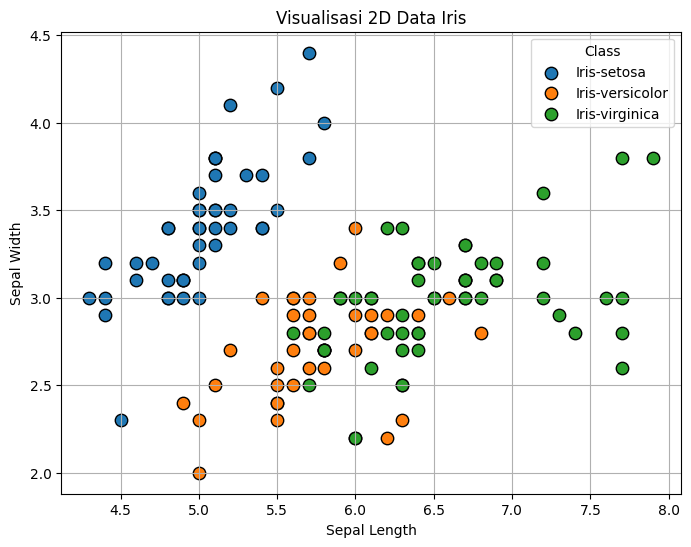

In [9]:
# Ubah kolom 'class' menjadi kategori jika belum
df_filtered['class'] = df_filtered['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_filtered['class'].cat.categories:
    subset = df_filtered[df_filtered['class'] == label]
    plt.scatter(subset['sepal length'], subset['sepal width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()

visualisasi data Iris dengan 3 Dimensi tanpa menggunakan PCA

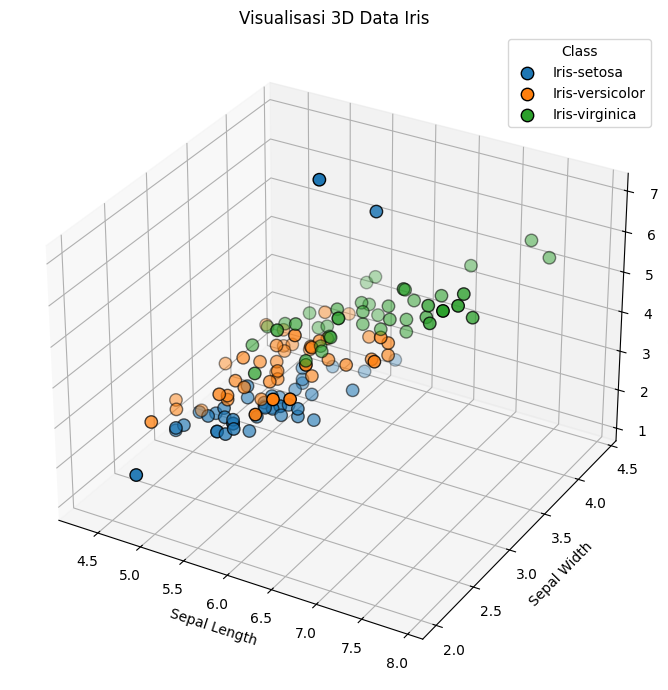

In [10]:
df_filtered['class'] = df_filtered['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_filtered['class'].cat.categories:
    subset = df_filtered[df_filtered['class'] == label]
    ax.scatter(
        subset['sepal length'],
        subset['sepal width'],
        subset['petal length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

## Visualisasi data asli tanpa outlier menggunakan PCA

visualisasi data Iris dengan 2 Dimensi menggunakan PCA

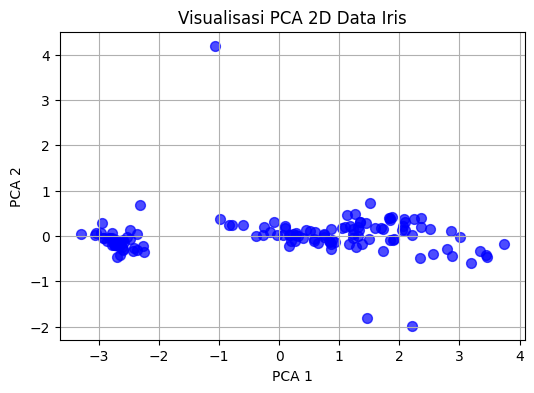

In [11]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_filtered.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

visualisasi data Iris dengan 3 Dimensi menggunakan PCA

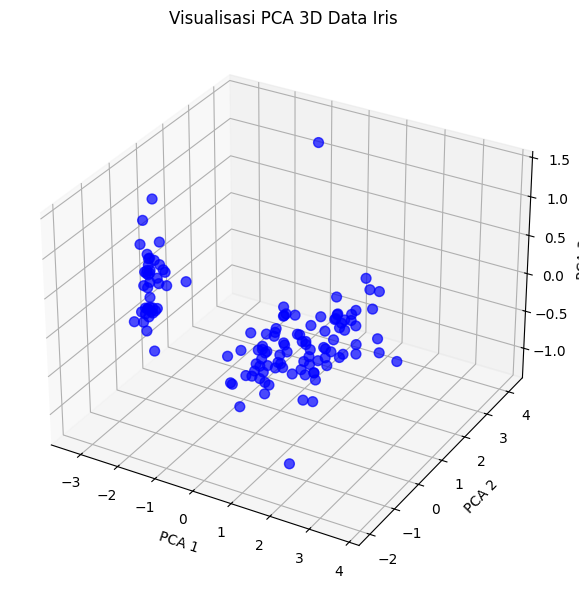

In [12]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_filtered.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()

## Preprocessing dan Reduksi Dimensi

### Standarisasi dengan menggunakan Standar Scaler

standarisasi menggunakan Standard Scaler untuk menyamakan skala antar fitur dalam dataset.karena memiliki rentang nilai yang sangat bervariasi. Perbedaan skala ini dapat menyebabkan model machine learning.

teknik praproses data (data preprocessing) untuk menyamakan skala fitur dalam sebuah dataset. Tujuannya adalah agar setiap fitur (variabel) memiliki kontribusi yang seimbang terhadap proses pengolahan data, terutama dalam algoritma berbasis jarak

In [13]:
# # Drop kolom non-numerik
# features = df_merged.drop(columns=['id', 'class'])

# # Normalisasi
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)

# # Reduksi dimensi untuk visualisasi
# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(scaled_features)


### Data setelah standarisasi menggunakan StandardScaler

In [14]:
# print (scaled_features);

### Standarisasi dengan menggunakan MinMaxScaler

normalisasi menggunakan MinMaxScaler sebagai upaya untuk menyamakan skala seluruh fitur dalam dataset.karena fitur-fitur dalam data memiliki rentang nilai yang berbeda-beda, yang dapat memengaruhi kinerja model machine learning, terutama algoritma yang bergantung pada perhitungan jarak seperti KNN atau SVM.

MinMaxScaler bekerja dengan cara mengubah setiap nilai dalam fitur ke dalam rentang antara 0 hingga 1, berdasarkan nilai minimum dan maksimum dari fitur tersebut.

In [15]:
# Drop kolom non-numerik
features = df_filtered.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


data hasil standarisasi menggunakan MinMaxScaler



In [17]:
print (scaled_features);

[[0.05084746 0.02040816 0.22222222 0.625     ]
 [0.05084746 0.02040816 0.16666667 0.41666667]
 [0.06779661 0.02040816 0.08333333 0.45833333]
 [0.05084746 0.02040816 0.19444444 0.66666667]
 [0.06779661 1.         0.19444444 0.58333333]
 [0.05084746 0.02040816 0.02777778 0.375     ]
 [0.08474576 0.20408163 0.16666667 0.45833333]
 [1.         0.02040816 0.30555556 0.70833333]
 [0.08474576 0.02040816 0.13888889 0.58333333]
 [0.05084746 0.         0.13888889 0.41666667]
 [0.         0.         0.         0.41666667]
 [0.83050847 0.02040816 0.41666667 0.83333333]
 [0.06779661 0.06122449 0.38888889 1.        ]
 [0.05084746 0.04081633 0.22222222 0.625     ]
 [0.10169492 0.04081633 0.38888889 0.75      ]
 [0.06779661 0.04081633 0.22222222 0.75      ]
 [0.10169492 0.02040816 0.30555556 0.58333333]
 [0.06779661 0.06122449 0.22222222 0.70833333]
 [0.10169492 0.08163265 0.22222222 0.54166667]
 [0.13559322 0.02040816 0.13888889 0.58333333]
 [0.08474576 0.02040816 0.19444444 0.41666667]
 [0.08474576 

## Clustering menggunakan Fuzzy C-Means

### Clustering dengan 2 cluster dan Visualisasi data

clustering menggunakan Fuzzy C-Means dengan 2 cluster dan menghitung Pusat Cluster dan Fungsi Objektif dari semua iterasi dan  melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 2 Clusters]
Silhouette Score: 0.5718
Fuzzy Partition Coefficient (FPC): 0.8365
Objective Function Value (Jm): 8.0921
Cluster Centers (in scaled feature space):
[[0.65941474 0.3286337  0.55481243 0.37999901]
 [0.09834686 0.05328756 0.20080088 0.54774561]]
Objective Function Values per Iteration:
Iterasi 01: 16.3936
Iterasi 02: 13.4908
Iterasi 03: 13.4783
Iterasi 04: 13.4048
Iterasi 05: 12.9242
Iterasi 06: 10.8971
Iterasi 07: 8.4668
Iterasi 08: 8.1022
Iterasi 09: 8.0925
Iterasi 10: 8.0921
Iterasi 11: 8.0921


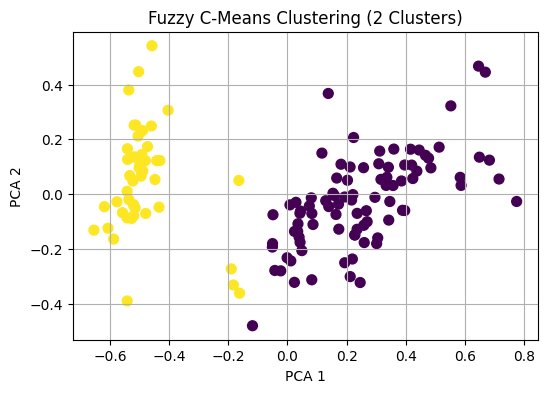

In [18]:

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_2 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_2)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 2 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

visualisasi 3 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 2 Clusters]
Silhouette Score: 0.5718
Fuzzy Partition Coefficient (FPC): 0.8365
Objective Function Value (Jm): 8.0921
Cluster Centers (in scaled feature space):
[[0.65941474 0.3286337  0.55481243 0.37999901]
 [0.09834686 0.05328756 0.20080088 0.54774561]]
Objective Function Values per Iteration:
Iterasi 01: 16.3936
Iterasi 02: 13.4908
Iterasi 03: 13.4783
Iterasi 04: 13.4048
Iterasi 05: 12.9242
Iterasi 06: 10.8971
Iterasi 07: 8.4668
Iterasi 08: 8.1022
Iterasi 09: 8.0925
Iterasi 10: 8.0921
Iterasi 11: 8.0921


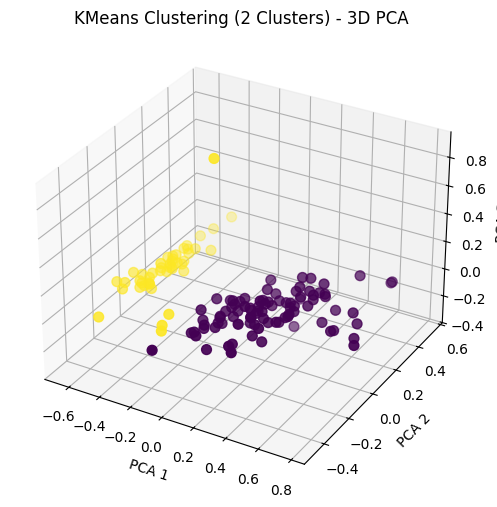

In [19]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_2 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_2)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 2 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 3 cluster dan Visualisasi data

clustering Fuzzy C-Means dengan 3 cluster dan menghitung Pusat Cluster.Fungsi Objektif dari semua iterasi dan melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 3 Clusters]
Silhouette Score: 0.4655
Fuzzy Partition Coefficient (FPC): 0.7213
Objective Function Value (Jm): 4.4020
Cluster Centers (in scaled feature space):
[[0.75361609 0.38880405 0.68343838 0.45300824]
 [0.55257802 0.265686   0.42205002 0.30823931]
 [0.07311666 0.03875728 0.19148744 0.5661389 ]]
Objective Function Values per Iteration:
Iterasi 01: 11.7221
Iterasi 02: 8.7493
Iterasi 03: 7.5768
Iterasi 04: 5.2784
Iterasi 05: 4.6590
Iterasi 06: 4.4673
Iterasi 07: 4.4140
Iterasi 08: 4.4044
Iterasi 09: 4.4026
Iterasi 10: 4.4022
Iterasi 11: 4.4021
Iterasi 12: 4.4021
Iterasi 13: 4.4021
Iterasi 14: 4.4020


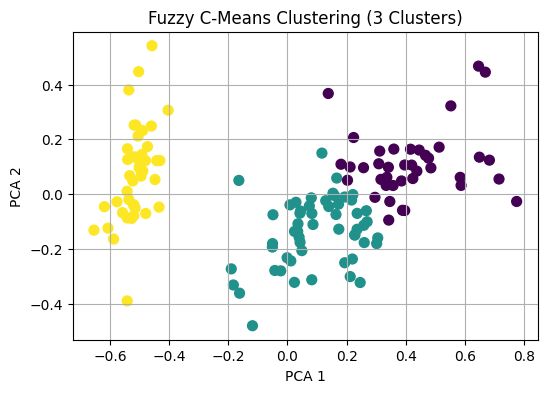

In [20]:
# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_3 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_3)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 3 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

visualisasi 3 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 3 Clusters]
Silhouette Score: 0.4655
Fuzzy Partition Coefficient (FPC): 0.7213
Objective Function Value (Jm): 4.4020
Cluster Centers (in scaled feature space):
[[0.75361609 0.38880405 0.68343838 0.45300824]
 [0.55257802 0.265686   0.42205002 0.30823931]
 [0.07311666 0.03875728 0.19148744 0.5661389 ]]
Objective Function Values per Iteration:
Iterasi 01: 11.7221
Iterasi 02: 8.7493
Iterasi 03: 7.5768
Iterasi 04: 5.2784
Iterasi 05: 4.6590
Iterasi 06: 4.4673
Iterasi 07: 4.4140
Iterasi 08: 4.4044
Iterasi 09: 4.4026
Iterasi 10: 4.4022
Iterasi 11: 4.4021
Iterasi 12: 4.4021
Iterasi 13: 4.4021
Iterasi 14: 4.4020


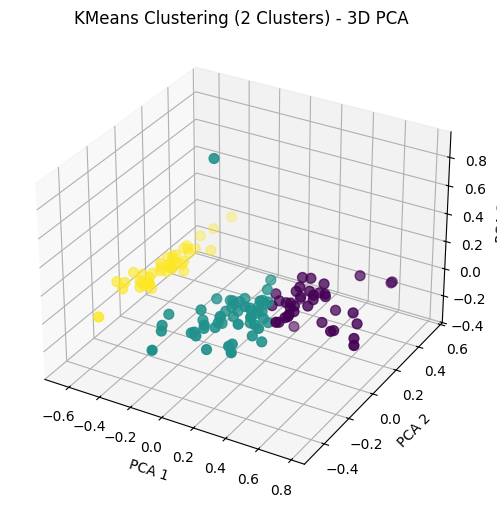

In [21]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_3 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_3)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 3 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 4 cluster dan Visualisasi data

clustering dengan Fuzzy C-Means dengan 4 cluster sekaligus menghitung Pusat Cluster dan Fungsi Objektif dari semua iterasi dan melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 4 Clusters]
Silhouette Score: 0.3977
Fuzzy Partition Coefficient (FPC): 0.6290
Objective Function Value (Jm): 3.1942
Cluster Centers (in scaled feature space):
[[0.6380083  0.3178728  0.5159201  0.37402302]
 [0.78846985 0.40564567 0.73652875 0.47201699]
 [0.0693109  0.03563937 0.19097178 0.56984262]
 [0.48979751 0.23124148 0.3642965  0.26101435]]
Objective Function Values per Iteration:
Iterasi 01: 9.0106
Iterasi 02: 6.6440
Iterasi 03: 6.0915
Iterasi 04: 4.4373
Iterasi 05: 3.5807
Iterasi 06: 3.3821
Iterasi 07: 3.3143
Iterasi 08: 3.2541
Iterasi 09: 3.2150
Iterasi 10: 3.2005
Iterasi 11: 3.1962
Iterasi 12: 3.1949
Iterasi 13: 3.1945
Iterasi 14: 3.1943
Iterasi 15: 3.1943
Iterasi 16: 3.1943
Iterasi 17: 3.1943
Iterasi 18: 3.1942


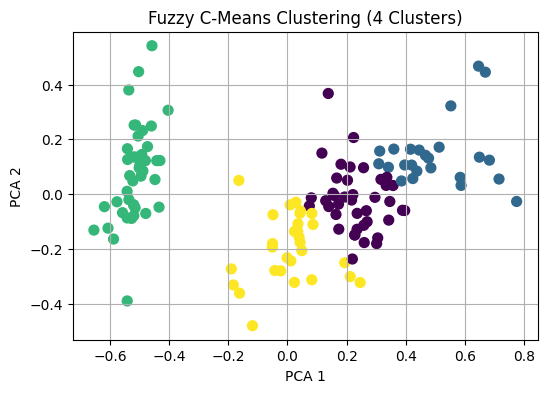

In [22]:
# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 4
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_4 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_4)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 4 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

visualisasi 3 Dimensi pada data Iris setelah clustering

[Fuzzy C-Means - 4 Clusters]
Silhouette Score: 0.3977
Fuzzy Partition Coefficient (FPC): 0.6290
Objective Function Value (Jm): 3.1942
Cluster Centers (in scaled feature space):
[[0.6380083  0.3178728  0.5159201  0.37402302]
 [0.78846985 0.40564567 0.73652875 0.47201699]
 [0.0693109  0.03563937 0.19097178 0.56984262]
 [0.48979751 0.23124148 0.3642965  0.26101435]]
Objective Function Values per Iteration:
Iterasi 01: 9.0106
Iterasi 02: 6.6440
Iterasi 03: 6.0915
Iterasi 04: 4.4373
Iterasi 05: 3.5807
Iterasi 06: 3.3821
Iterasi 07: 3.3143
Iterasi 08: 3.2541
Iterasi 09: 3.2150
Iterasi 10: 3.2005
Iterasi 11: 3.1962
Iterasi 12: 3.1949
Iterasi 13: 3.1945
Iterasi 14: 3.1943
Iterasi 15: 3.1943
Iterasi 16: 3.1943
Iterasi 17: 3.1943
Iterasi 18: 3.1942


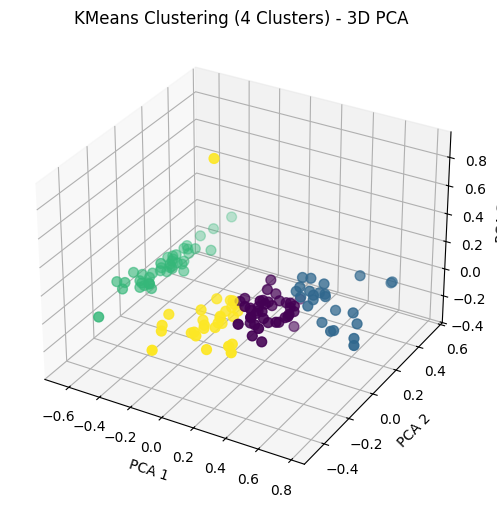

In [23]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Fuzzy C-Means clustering
n_clusters = 4
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_4 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_4)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 4 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()
